In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/B_plasma/")

In [3]:
sc.__version__

'1.8.2'

In [4]:
## read data
adata = sc.read_h5ad("./B_plasma.bySample.n10.filtered.bbknn_umap_leiden_marker.res1.2.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [5]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


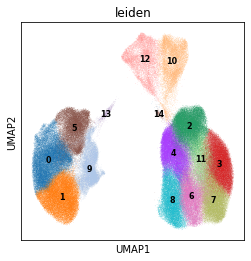

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

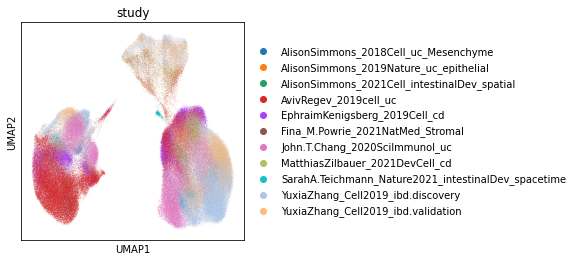

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"])

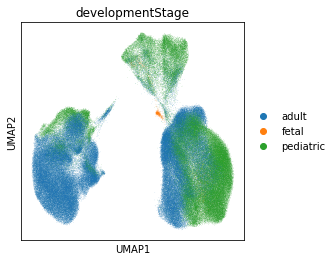

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["developmentStage"])

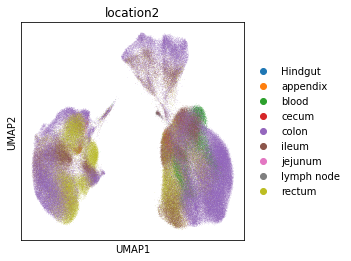

In [9]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["location2"])

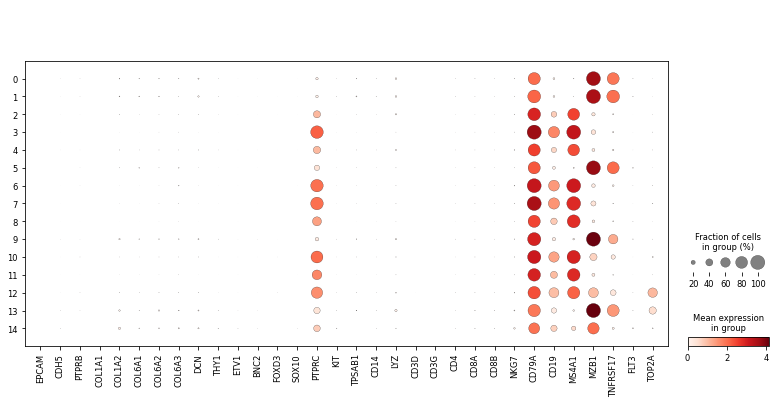

In [8]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "FLT3","TOP2A",
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

In [9]:
## explore DEG
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,IGHA1,IGHA1,TMSB4X,CD74,B2M,TXNDC5,HLA-A,SLC2A3,MTRNR2L12,IGHG1,ACTG1,CD74,HMGB1,SUB1,SOX4
1,IGHA2,HSPA1B,CD52,HLA-DRB1,MALAT1,HSP90B1,HLA-DQA1,CD83,KLF6,IGHG3,GAPDH,CD37,HMGB2,SDF2L1,CD79B
2,SSR4,HSPA1A,MALAT1,HLA-DQA1,TMSB4X,PPIB,CD74,NR4A2,PPP1R15A,XBP1,SERF2,HLA-DPA1,HMGN2,CHCHD2,VPREB1
3,MZB1,FKBP2,TMSB10,TCL1A,UBA52,SSR4,EEF1G,BTG1,FOSB,IGHG4,ACTB,LINC00926,STMN1,H2AFZ,RCSD1
4,FKBP11,IGHA2,UBA52,PTPRCAP,TOMM7,MZB1,EEF1A1,HLA-DQA1,EIF1,MZB1,RGS13,MS4A1,GAPDH,PPIB,STMN1
5,FKBP2,DNAJB1,HLA-DPB1,CD37,CD52,SEC61B,RAC2,CD55,H3F3B,SSR4,MARCKSL1,BTG1,H2AFZ,GAPDH,PTMA
6,XBP1,MZB1,HLA-DRA,ACTB,HLA-DPB1,JUN,PTPRCAP,LY9,DUSP1,IGHG2,LIMD2,HLA-DRB1,TUBB,KDELR2,HIST1H2AC
7,DERL3,SSR4,BTG1,CD52,HLA-DRA,DERL3,COTL1,HLA-DRB1,ZFP36,PRDX4,PFN1,HLA-DQB1,TUBA1B,HSP90B1,HSP90AA1
8,SEC11C,TNFRSF17,FAU,FCER2,FAU,KRTCAP2,CD82,CXCR4,JUNB,FKBP11,MEF2B,HLA-DRA,PFN1,SEC61B,ZEB2
9,TNFRSF17,LGALS1,IGHM,HLA-DPA1,LTB,VIM,MS4A1,ZNF331,NR4A2,DERL3,HMGN1,KLF2,PTMA,MZB1,IGLL1


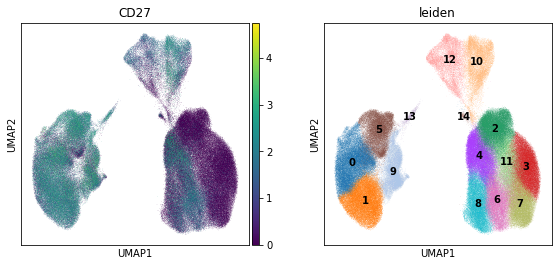

In [10]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['CD27',"leiden"], legend_loc='on data')

In [11]:
adata.obs["label"] = "Plasma"
select = adata.obs[ adata.obs.leiden.isin(['4','6','8']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Memory B'

select = adata.obs[ adata.obs.leiden.isin(['2','3','7','11']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Naive B'

select = adata.obs[ adata.obs.leiden.isin(['12']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Cycling GC B'

select = adata.obs[ adata.obs.leiden.isin(['10']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'GC B'

select = adata.obs[ adata.obs.leiden.isin(['14']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Pro-B'

select = adata.obs[ adata.obs.leiden.isin(['13']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Cycling plasma'

... storing 'label' as categorical


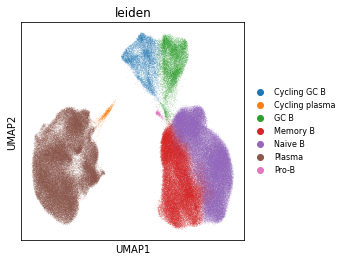

In [12]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', title='leiden', frameon=True, legend_fontsize = 8)

In [13]:
## Classify IgA and IgG plasma cells

In [14]:
plasma_cells = adata.obs[adata.obs.label == "Plasma"].index.to_list()

In [15]:
len(plasma_cells)

92826

In [16]:
tmp = sc.read_h5ad("../ibd_20220111.raw.h5ad")

In [17]:
tmp = tmp[plasma_cells]

In [18]:
tmp

View of AnnData object with n_obs × n_vars = 92826 × 16105
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [19]:
IGHA = tmp[:,"IGHA1"].X.toarray() + tmp[:,"IGHA2"].X.toarray()
IGHG = tmp[:,"IGHG1"].X.toarray() + tmp[:,"IGHG2"].X.toarray() + tmp[:,"IGHG3"].X.toarray() + tmp[:,"IGHG4"].X.toarray()

In [20]:
total = np.array(tmp.X.sum(axis=1))
IGHA_exp = np.log2( IGHA*10000/total + 1)
IGHG_exp = np.log2( IGHG*10000/total + 1)

In [21]:
len(IGHG_exp)

92826

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'IGHA')

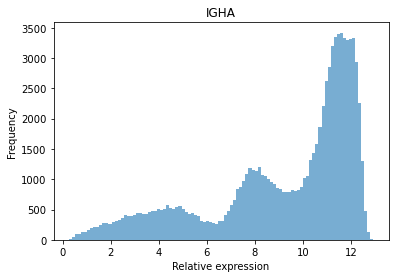

In [23]:
fig,ax=plt.subplots()
data = IGHA_exp
data = data[data!=0]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="IGHA")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("IGHA")

Text(0.5, 1.0, 'IGHG')

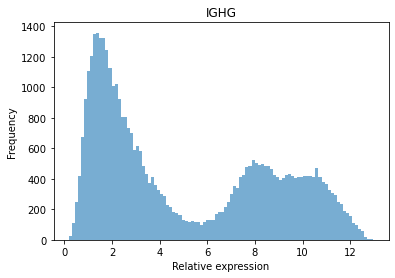

In [24]:
fig,ax=plt.subplots()
data = IGHG_exp
data = data[data!=0]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="IGHG")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("IGHG")

In [ ]:
fig=plt.figure(figsize=(6,6))
plt.scatter(x=IGHA_exp, y=IGHG_exp, alpha = 0.5, s = 0.5)
#plt.axvline(2.4, color = "red", linestyle = ":")
#plt.axhline(0.9, color = "red", linestyle = ":")
plt.xlabel("Relative expression of IGHA")
plt.ylabel("Relative expression of IGHG")
plt.axhline(6, color = "red", linestyle = "--")
plt.axvline(6, color = "red", linestyle = "--")
plt.savefig("IgA_IgG_exp.png")

In [26]:
IgA = tmp.obs[ np.logical_and( IGHA_exp > 6, IGHG_exp < 6) ].index.to_list()
IgG = tmp.obs[ np.logical_and( IGHG_exp > 6, IGHA_exp < 6) ].index.to_list()
DN = tmp.obs[ np.logical_and( IGHG_exp <= 6, IGHA_exp <= 6) ].index.to_list()
DP = tmp.obs[ np.logical_and( IGHG_exp > 6, IGHA_exp > 6) ].index.to_list()

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


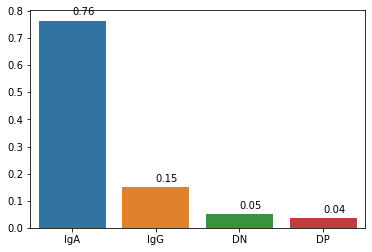

In [34]:
import seaborn as sns
x = ['IgA', 'IgG', 'DN', 'DP']
y = pd.Series([len(IgA), len(IgG), len(DN), len(DP)])
y = y/len(tmp.obs.index)
plot = sns.barplot(x, y)
for i in range(len(y)):
    plot.text( i, y[i]+ 0.02, "{:.2f}".format(y[i]))
plt.savefig("IgA_IgG_pct.pdf")

In [28]:
adata.obs.label = adata.obs.label.to_list()
select = adata.obs[ adata.obs.index.isin(IgA) ].index.to_list()
adata.obs.loc[select, 'label'] = 'IgA plasma'

select = adata.obs[ adata.obs.index.isin(IgG)].index.to_list()
adata.obs.loc[select, 'label'] = 'IgG plasma'

select = adata.obs[ adata.obs.index.isin(DP)].index.to_list()
adata.obs.loc[select, 'label'] = 'IgA+IgG+ plasma'

select = adata.obs[ adata.obs.index.isin(DN)].index.to_list()
adata.obs.loc[select, 'label'] = 'IgA-IgG- plasma'

In [29]:
newOrder = ["IgA plasma","IgG plasma","IgA+IgG+ plasma","IgA-IgG- plasma",
            "Pro-B", "Naive B", "Memory B", "GC B", "Cycling GC B", "Cycling plasma"]
adata.obs.label =pd.Categorical(adata.obs.label)
adata.obs.label = adata.obs.label.cat.set_categories( newOrder )

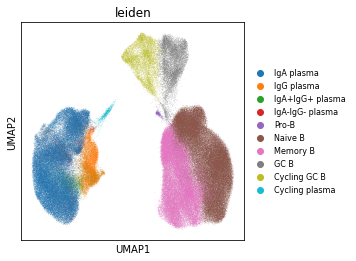

In [30]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', title='leiden', frameon=True, legend_fontsize = 8)

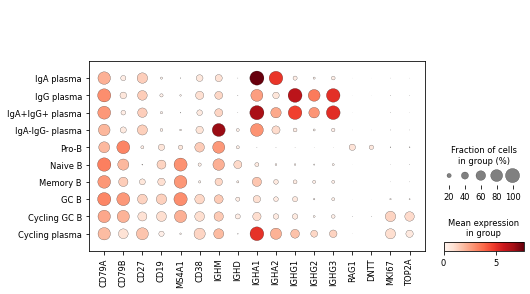

In [39]:
markers = ["CD79A","CD79B","CD27","CD19","MS4A1","CD38",
           "IGHM","IGHD","IGHA1","IGHA2","IGHG1","IGHG2","IGHG3",
            "RAG1","DNTT",
           "MKI67","TOP2A"]
sc.pl.dotplot(adata, markers, groupby='label')

In [32]:
## Pro-B
#sc.pl.dotplot(adata, ["RAG1","DNTT","SOX4","IGLL1"], groupby='leiden')

In [33]:
## Cycling
#sc.pl.dotplot(adata, ["MKI67","TOP2A","SDC1"], groupby='leiden')

In [34]:
#for i in list(range(len(set(adata.obs.leiden)))):
#    with rc_context({'figure.figsize': (4, 4)}):
#        sc.pl.umap(adata, color='leiden', groups=[str(i)])

In [35]:
adata.obs["major"] = "B/Plasma"

In [36]:
adata = adata.raw.to_adata()

In [37]:
#adata.var.index = [ x.replace("-","_") for x in adata.var.index.to_list()]

In [38]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [39]:
adata.write_h5ad("B_plasma.clean.h5ad")

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'major' as categorical


In [40]:
adata.write_loom("B_plasma.clean.loom", write_obsm_varm=True)

In [41]:
## plot heatmap, dot plot, gene expression, plot DEG
major_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[:50, 17].to_list()
sc.pl.dotplot(adata, major_markers, groupby='leiden')
